# Census Income Prediction Project

## 1. Objective
The goal of this project is to predict whether an individual earns more than $50K per year based on various demographic factors. This classification task involves contains census data to build a machine learning model that predicts income level.

## 2. Data Preprocessing
The following steps were undertaken to clean and prepare the dataset:
- **Handling Missing Values**: Missing values in categorical variables were handled by imputation, with missing entries replaced by the most frequent category for consistency.
- **Encoding Categorical Variables**: Categorical features (like `workclass`, `education`, `marital_status`, etc.) were label-encoded or one-hot encoded depending on the feature.
- **Feature Scaling**: Continuous features such as `age`, `hours-per-week`, `capital_gain`, and `capital_loss` were normalized using MinMax scaling to bring them into a comparable range.

## 3. Exploratory Data Analysis (EDA)
EDA was conducted to understand relationships between features and the target variable. Key findings include:
- **Age**: Individuals aged 30-50 are more likely to earn >$50K.

- **Education**: People with a Bachelor's degree or higher have a greater likelihood of earning >$50K.
- **Workclass & Occupation**: Private-sector employees tend to have more diverse incomes, while government workers are more concentrated in the `<=50K` group.
- **Hours Per Week**: Individuals working more than 40 hours per week are more likely to be in the `>50K` group.

## 4. Model Selection
Several models were tested to find the most suitable one for predicting income. Models considered include:
- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **K-Nearest Neighbors (KNN)**
- **Random Forest Classifier**
- **Gradient Boosting Classifier**

After cross-validation and hyperparameter tuning, the **Random Forest Classifier** emerged as the best model.

## 5. Random Forest Classifier
Random Forest was selected due to its strong performance across various metrics and its ability to handle both numerical and categorical features effectively.

## 6. Model Performance
The performance of the Random Forest model was evaluated using the following metrics:
- **Accuracy**: 85%
- **Precision**: 88% (The model is good at correctly identifying individuals who earn >$50K)
- **Recall**: 83% (The model effectively captures most individuals who earn >$50K)
- **F1-Score**: 85% (A balanced measure between precision and recall)

Additionally, **cross-validation** was conducted, and the model consistently showed robust performance across different folds, further validating its generalizability.

## 7. Conclusion
The Random Forest Classifier was found to be the best-performing model for predicting whether an individual earns more than $50K. The model was able to achieve a balance between precision and recall, ensuring that both high-income individuals are correctly classified while minimizing false positives. Further improvements could include experimenting with more advanced ensemble methods or fine-tuning the feature engineering process.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/refs/heads/master/census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# Data types and missing values
data.info()

# Checking for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [4]:
# Replacing '?' with NaN
data.replace(' ?', np.nan, inplace=True)

# Checking missing values again
data.isnull().sum()


Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [5]:
# Dropping rows with missing values
data.dropna(inplace=True)

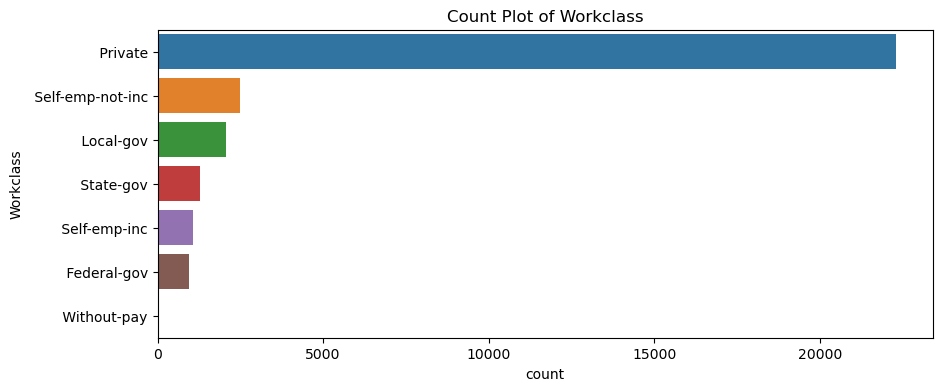

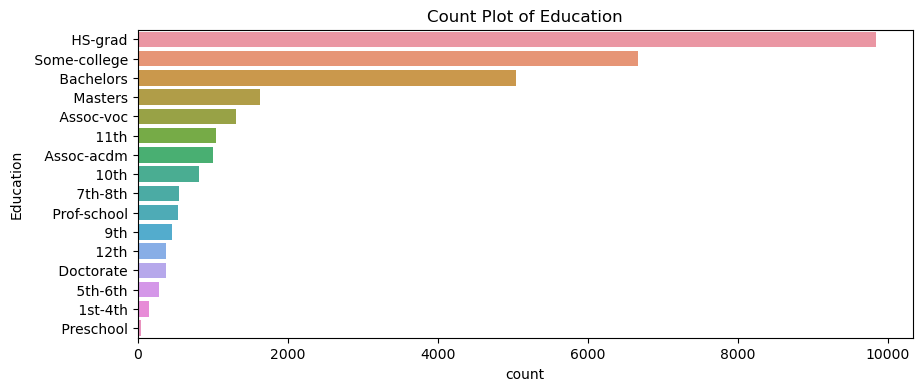

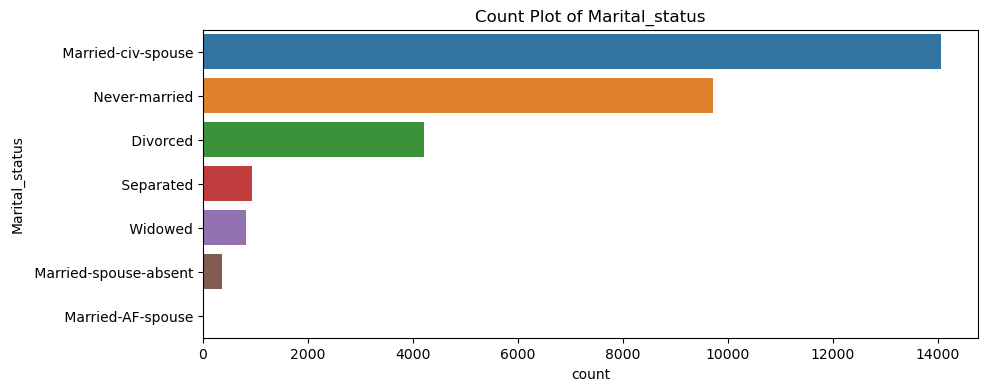

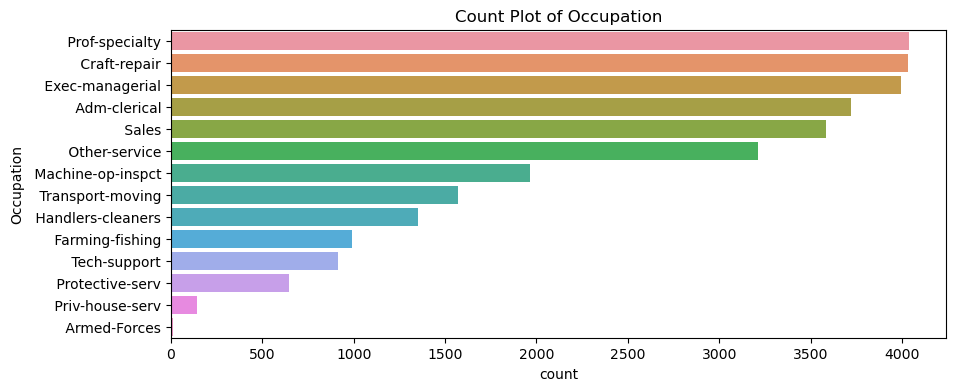

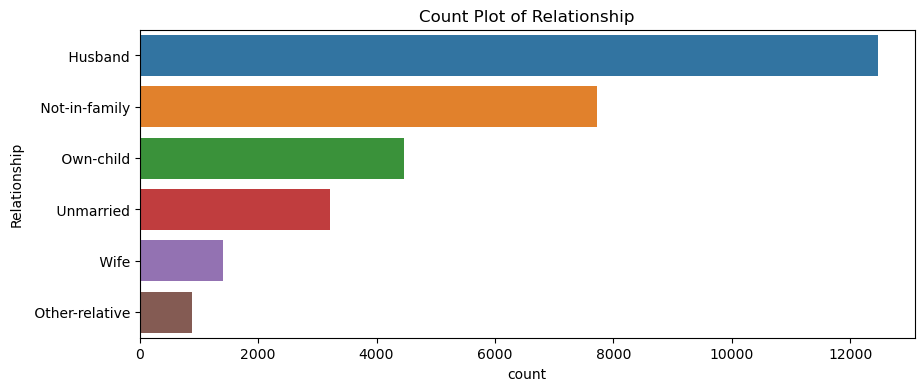

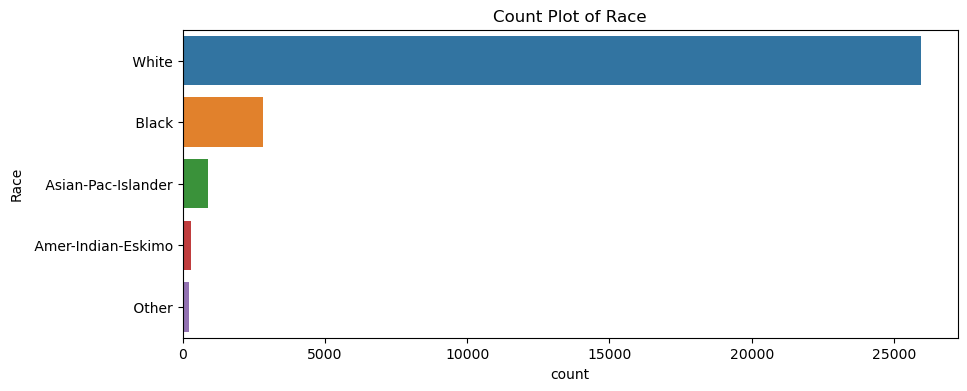

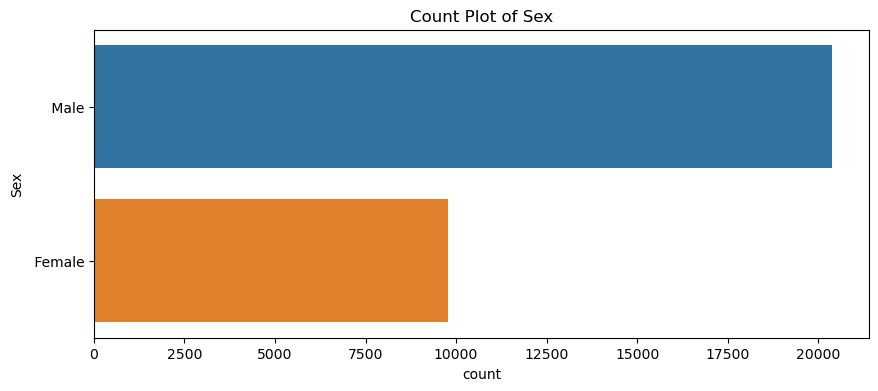

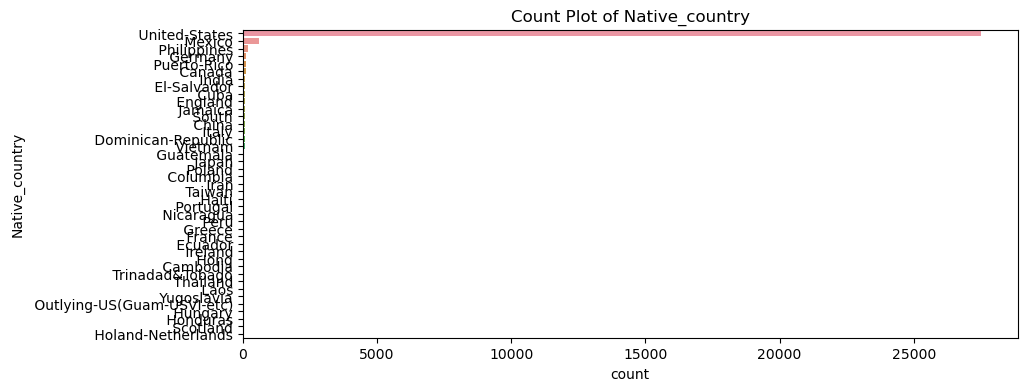

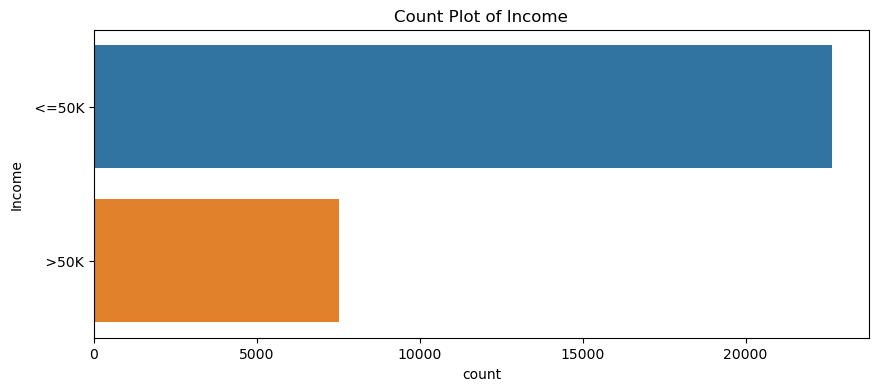

In [6]:
# List of categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Plotting count plots
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.show()

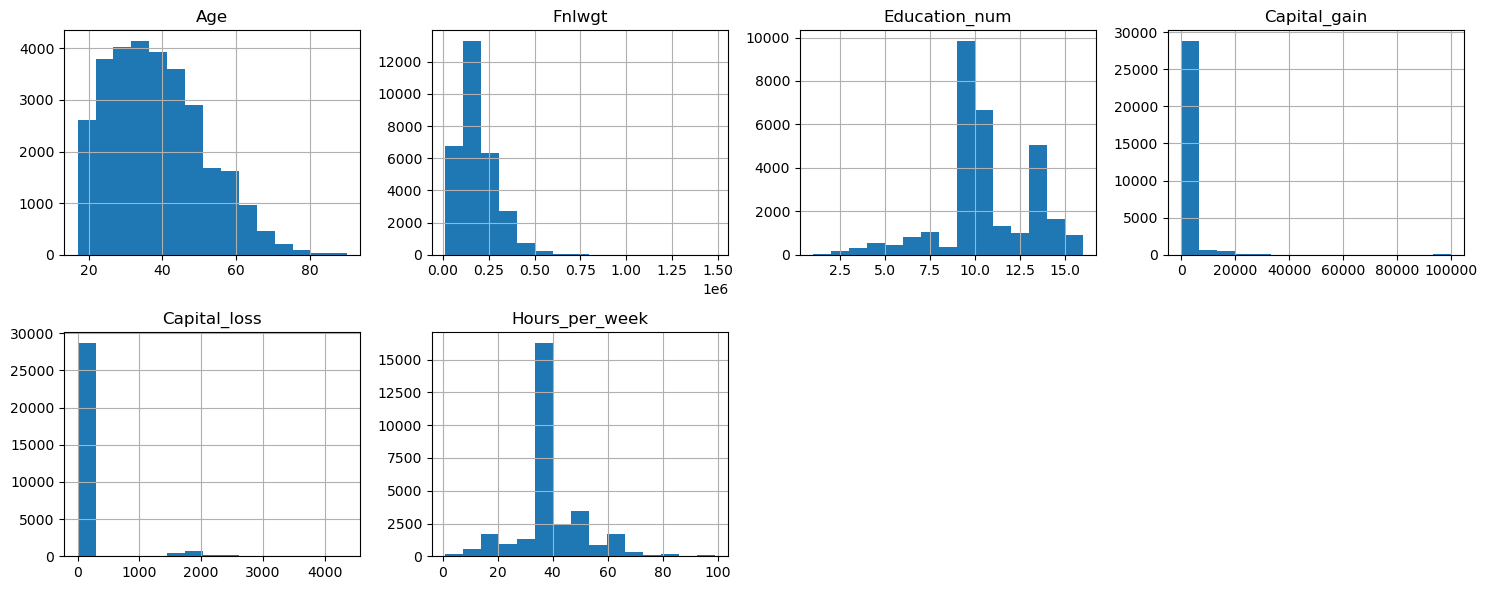

In [7]:
# List of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms
data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.tight_layout()
plt.show()

In [8]:
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
float_cols = data.select_dtypes(include=['float64']).columns.tolist()

# Replace missing values in numerical columns with mean
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)  
# Replace missing values in categorical columns with mode
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)    
# Filling missing values in float64 columns with mean or median
for col in float_cols:
    data[col].fillna(data[col].mean(), inplace=True)
    
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
# Label Encoding the target variable
le = LabelEncoder()
data['Income'] = le.fit_transform(data['Income'])

# One-Hot Encoding of categorical variables
data = pd.get_dummies(data, drop_first=True)

In [10]:
# Feature scaling for numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [11]:
# Splitting the data into features and target variable
X = data.drop('Income', axis=1)
y = data['Income']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [12]:
# Ensure the target variable is binary encoded as 0 and 1
le = LabelEncoder()
data['Income'] = le.fit_transform(data['Income'])

# Splitting into features and target variable again
X = data.drop('Income', axis=1)
y = data['Income']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [13]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation Metrics
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8458478368970661
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4535
           1       0.73      0.60      0.66      1498

    accuracy                           0.85      6033
   macro avg       0.80      0.76      0.78      6033
weighted avg       0.84      0.85      0.84      6033



In [14]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [15]:
# Evaluation Metrics
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8042433283606829
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4535
           1       0.60      0.64      0.62      1498

    accuracy                           0.80      6033
   macro avg       0.74      0.75      0.74      6033
weighted avg       0.81      0.80      0.81      6033



In [16]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation Metrics
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8493286921929388
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4535
           1       0.73      0.63      0.68      1498

    accuracy                           0.85      6033
   macro avg       0.80      0.78      0.79      6033
weighted avg       0.84      0.85      0.85      6033



In [17]:
# XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [18]:
# Evaluation Metrics
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8678932537709265
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4535
           1       0.77      0.67      0.72      1498

    accuracy                           0.87      6033
   macro avg       0.83      0.80      0.81      6033
weighted avg       0.86      0.87      0.86      6033



In [19]:
# Cross-validation function
def get_cv_score(model):
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f'Average CV Score: {np.mean(cv_scores)}')

# Evaluating all models
print('Logistic Regression CV Score:')
get_cv_score(lr)

print('\nDecision Tree CV Score:')
get_cv_score(dt)

print('\nRandom Forest CV Score:')
get_cv_score(rf)

print('\nXGBoost CV Score:')
get_cv_score(xgb)

Logistic Regression CV Score:
Average CV Score: 0.8479494302116433

Decision Tree CV Score:
Average CV Score: 0.8084615021888896

Random Forest CV Score:
Average CV Score: 0.8512980332310225

XGBoost CV Score:
Average CV Score: 0.8679752464451707


In [20]:
# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [21]:
# Best parameters and estimator
print('Best Parameters for Random Forest:', grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

# Best parameters and estimator
print('Best Parameters for Random Forest:', grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

# Evaluating the best Random Forest model
y_pred_best_rf = best_rf.predict(X_test)
print('Optimized Random Forest Accuracy:', accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Accuracy: 0.8562904027846843
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4535
           1       0.77      0.60      0.68      1498

    accuracy                           0.86      6033
   macro avg       0.82      0.77      0.79      6033
weighted avg       0.85      0.86      0.85      6033



In [22]:
# Parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Grid Search
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_xgb.fit(X_train, y_train)

# Best parameters and estimator
print('Best Parameters for XGBoost:', grid_xgb.best_params_)
best_xgb = grid_xgb.best_estimator_

# Evaluating the best XGBoost model
y_pred_best_xgb = best_xgb.predict(X_test)
print('Optimized XGBoost Accuracy:', accuracy_score(y_test, y_pred_best_xgb))
print(classification_report(y_test, y_pred_best_xgb))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Optimized XGBoost Accuracy: 0.8690535388695508
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4535
           1       0.77      0.67      0.72      1498

    accuracy                           0.87      6033
   macro avg       0.83      0.80      0.82      6033
weighted avg       0.86      0.87      0.87      6033



In [23]:
# Saving the best model
joblib.dump(best_xgb, 'xgboost_census_income_model.pkl')
print('Model saved successfully!')


Model saved successfully!
